# Predicting Credit Score with Risk Based Approach

#### Last Update:
11th March 2021

## Loading Libraries & Importing Dataset

In [1]:
#importing libraries

#basic analysis libraries
import pandas as pd
import numpy as np

#visulaisation libraries
from IPython.display import display, Markdown
from matplotlib import pyplot as plt
import seaborn as sns

#transformation libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pandas import cut, qcut

#dimensional reduction
from sklearn.decomposition import PCA

#machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

#evaluation libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from scipy.stats import spearmanr 



#loading dataset
df_original = pd.read_excel('RBA_KYC_Accounts_ALL_Ids.xlsx')
df = df_original.copy()
df.shape

(224868, 47)

## Preliminary Inspection

In [2]:
#preliminary inspection through basic stats
df.describe()

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,birthCountry,profession,companyType,lastUpdate,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868.000000,224868.000000,220153.000000,0.0,79748.000000,114574.000000,0.0,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,0.0,224868.000000
mean,1.0,448.451323,4.394503e+16,1.114418,1.021221,41.310575,NaN,18.309487,49.857577,NaN,...,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,17.624194
std,0.0,228.193308,2.349321e+16,0.318319,0.144122,16.000536,NaN,6.586481,6.736115,NaN,...,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,8.368345
min,1.0,201.000000,2.020028e+09,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,1.000000,1.000000,31.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,1.000000,1.000000,41.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,1.000000,1.000000,52.000000,NaN,21.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,21.330000
max,1.0,805.000000,8.052929e+16,2.000000,2.000000,119.000000,NaN,39.000000,100.000000,NaN,...,1267.000000,0.000000e+00,3292.000000,5.867291e+05,78.000000,8.394000e+06,2858.000000,9.942530e+06,NaN,100.000000


In [3]:
#checking data structure
df.dtypes

org_code                        int64
branchCode                      int64
customerId                      int64
fullaccount                    object
customerType                    int64
creationDate                   object
onboarding                     object
residentStatus                  int64
residentCountry                object
nationalityOriginal            object
extraNationality               object
dateOfBirth                    object
age_in_year                   float64
birthCountry                  float64
birthPlace                     object
profession                    float64
companyType                   float64
giinCode                       object
lastUpdate                    float64
status                         object
ledgerCode                      int64
accountCurrency                object
jointAccount                    int64
IsBlackListed                   int64
CUS_CLASS                       int64
ECO_SEC                         int64
TYPE_OF_DEP 

## Data Cleaning & Transformation

### Dropping Empty Columns & Unnecessary Columns Based on Business Understanding

In [4]:
#dropping unneeded columns
drop_col = ["nationalityOriginal","extraNationality","dateOfBirth",
            "birthCountry","birthPlace","giinCode","lastUpdate",
            "status","GENDER","legal_Stat_desc","date_of_assessment",
            "rba_grade_desc","score_card_Desc"]
df.drop(drop_col, axis = 1, inplace = True)

In [5]:
#checking shape of dataframe
df.shape

(224868, 34)

### Dividing Dataset Based on Customer Type

In [6]:
#breaking dataset based on customer type
df_individual = df.loc[df['customerType'] == 1]
df_entities = df.loc[df['customerType'] == 2]

In [7]:
#checking null values
100*df_individual.isnull().sum()/df_individual.isnull().count()
100*df_entities.isnull().sum()/df_entities.isnull().count()

org_code                       0.000000
branchCode                     0.000000
customerId                     0.000000
fullaccount                    0.000000
customerType                   0.000000
creationDate                   0.000000
onboarding                     0.000000
residentStatus                 0.000000
residentCountry                0.023320
age_in_year                   14.334020
profession                    95.549769
companyType                    5.748377
ledgerCode                     0.000000
accountCurrency                0.000000
jointAccount                   0.000000
IsBlackListed                  0.000000
CUS_CLASS                      0.000000
ECO_SEC                        0.000000
TYPE_OF_DEP                    0.000000
LEGAL_STA_CODE                 0.606320
avg_last_10_days               0.000000
avg_last_30_days               0.000000
avg_last_90_days               0.000000
number_of_cash_dep_90_days     0.000000
avg_cash_deposit_90_days       0.000000


### Cleaning & Transforming Individuals' Dataset

In [8]:
#dropping unneeded columns in individual
drop_ind_col = ['companyType']
df_individual.drop(drop_ind_col, axis = 1, inplace = True)

/Users/sauravghoshroy/opt/anaconda3/envs/ssp/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Imputing Null Values & Transforming Into Categorical Variable - profession

In [9]:
#imputing null values in profession variable with 0
df_individual['profession'] = df_individual['profession'].replace(np.nan, 0).bfill()
#reading metadata for profession variable
meta_prof = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Profession')
#replacing whitespaces in metadata columns 'Value' & 'Code'
meta_prof['Value'] = meta_prof['Value'].replace(" ", 0).bfill() #replacing with 0
meta_prof['Code'] = meta_prof['Code'].replace(" ", 'RBA_PROF_High').bfill() #replacing with worst case
#creating dictionary from metadata
prof_dict = dict(zip(meta_prof.Value, meta_prof.Code))
prof_dict
#replacing profession value with categorical variable from metadata
df_individual['profession_label'] = df_individual['profession'].map(prof_dict)

<ipython-input-9-3a72b82c5f5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_individual['profession'] = df_individual['profession'].replace(np.nan, 0).bfill()
<ipython-input-9-3a72b82c5f5f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_individual['profession_label'] = df_individual['profession'].map(prof_dict)


### Dropping Rows with Null Values

In [10]:
#drop rows with null values in individual dataset
df_individual = df_individual.dropna()

### Transforming Variables Into Categorical Variable

In [11]:
#reading metadata for residentCountry variable
meta_count = pd.read_excel ('RBA Metadata.xlsx', sheet_name='COUNTRIES')
#creating dictionary from metadata
count_dict = dict(zip(meta_count.value, meta_count.code))
count_dict
#replacing ledgerCode value with categorical variable from metadata
df_individual['residentCountry_label'] = df_individual['residentCountry'].map(count_dict)

#Similar approach used for other variables

#ledgerCode
meta_ledger = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Ledgers')
ledger_dict = dict(zip(meta_ledger.value, meta_ledger.code))
ledger_dict
df_individual['ledgerCode_label'] = df_individual['ledgerCode'].map(ledger_dict)

#accountCurrency
meta_currencies = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Currencies')
currencies_dict = dict(zip(meta_currencies.value, meta_currencies.code))
currencies_dict
df_individual['accountCurrency_label'] = df_individual['accountCurrency'].map(currencies_dict)

#ECO_SEC
meta_eco = pd.read_excel ('RBA Metadata.xlsx', sheet_name='ECO_SEC')
eco_dict = dict(zip(meta_eco.value, meta_eco.code))
eco_dict
df_individual['ECO_SEC_label'] = df_individual['ECO_SEC'].map(eco_dict)

#Type_Of_DEP
meta_dep = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Type_Of_DEP')
dep_dict = dict(zip(meta_dep.value, meta_dep.code))
dep_dict
df_individual['TYPE_OF_DEP_label'] = df_individual['TYPE_OF_DEP'].map(dep_dict)

#Legal_STA_Code
meta_legal = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Legal_STA_Code')
legal_dict = dict(zip(meta_legal.value, meta_legal.code))
legal_dict
df_individual['LEGAL_STA_CODE_label'] = df_individual['LEGAL_STA_CODE'].map(legal_dict)

### Converting currencies to a base currency

In [12]:
#creating dictionary with currency code and exchange rate
exchange_rates = {'accountCurrency' : ['JOD', 'USD', 'EUR', 'CHF', 'GBP' , 'XAG', 'JPY',
                                       'AED' , 'CAD', 'SAR' , 'QAR' ,'AUD' , 'SEK','NZD',
                                       'LBP' , 'XAU' ,'DKK'  ,'BHD' , 'ESP' , 'KWD'],\
                  'exchangeRate' : [1 , 1.41, 1.17, 1.29, 1.01, 0.05, 150.35, 
                                    5.18, 1.79,5.29, 5.14, 1.82, 11.95, 1.95,
                                    2135.31, 0.00078, 8.72, 0.53, 194.87, 0.43]}
#converting dictionary to exchange rate dataframe
exchange_rates_df = pd.DataFrame.from_dict(exchange_rates)
#converting into dictionary for mapping
forex_dict = dict(zip(exchange_rates_df.accountCurrency, exchange_rates_df.exchangeRate))
#creating new column rate
df_individual['rate'] = df_individual['accountCurrency'].map(forex_dict)
#Converting currency related columns to base currency
cash_cols = ['avg_last_10_days', 'avg_last_30_days','avg_last_90_days',
             'avg_cash_deposit_90_days','avg_of_dep_90_days',
             'avg_of_cash_wd_90_days', 'avg_of_wd_90_days']
for col in cash_cols:
    new_col = col+'_JOD'
    df_individual[new_col] = df_individual[col]*df_individual['rate']

### Transforming creationDate into days

In [13]:
df_individual['creationDate_indays'] = df_individual['creationDate'].astype('datetime64[ns]').max()-df_individual['creationDate'].astype('datetime64[ns]')
df_individual['creationDate_indays'] = df_individual['creationDate_indays'] / np.timedelta64(1, 'D')

### Binning number of deposit and withdrawal days to get frequency categories

In [14]:
transaction_cols = ['number_of_cash_dep_90_days','number_of_deposit_90_days',
                    'number_of_cash_wd_90_days','number_of_wd_90_days']
for col in transaction_cols:
    col_bin = col+'_freq'
    df_individual[col_bin] = cut(df_individual[col],bins = [-1,0,1],labels = [0,1])

### Binning date variables

In [15]:
date_cols = ['age_in_year', 'creationDate_indays']
for col in date_cols:
    col_bin = col+'_bin'
    df_individual[col_bin] = qcut(df_individual[col],q=3)

### Encoding Categorical Variable into Numeric Type

In [16]:
obj_cat_cols = ['creationDate_indays_bin','age_in_year_bin','onboarding','score_card','profession_label','residentCountry_label','ledgerCode_label',
                'accountCurrency_label','ECO_SEC_label','TYPE_OF_DEP_label','LEGAL_STA_CODE_label',
                'number_of_cash_dep_90_days_freq','number_of_deposit_90_days_freq','number_of_cash_wd_90_days_freq',
                'number_of_wd_90_days_freq']

label_encoder = LabelEncoder()
for col in obj_cat_cols:
    df_individual[col] = label_encoder.fit_transform(df_individual[col].astype(str))

### Plotting distribution of variables

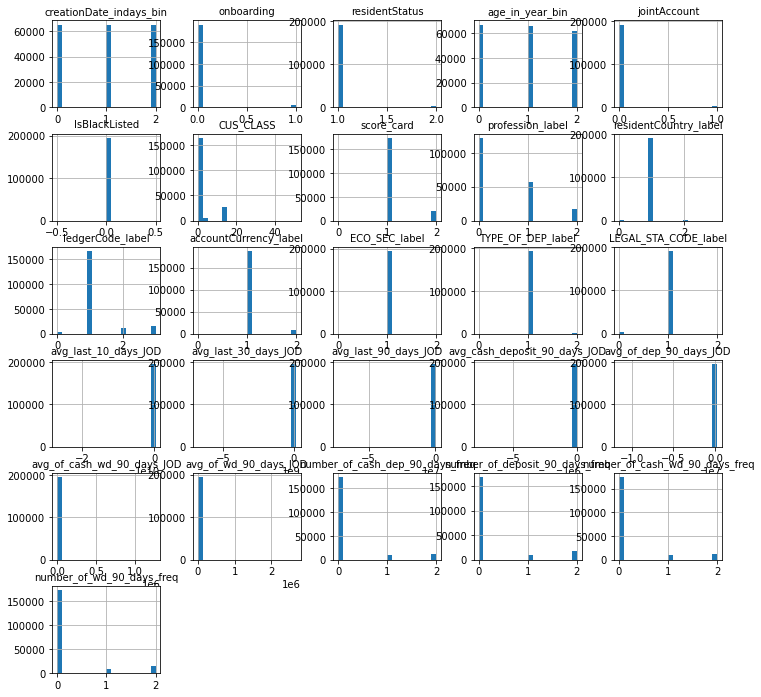

In [17]:
num_cols = ['creationDate_indays_bin','onboarding', 'residentStatus','age_in_year_bin','jointAccount',
          'IsBlackListed', 'CUS_CLASS','score_card','profession_label',
          'residentCountry_label', 'ledgerCode_label', 'accountCurrency_label',
          'ECO_SEC_label', 'TYPE_OF_DEP_label', 'LEGAL_STA_CODE_label',
          'avg_last_10_days_JOD', 'avg_last_30_days_JOD', 'avg_last_90_days_JOD',
          'avg_cash_deposit_90_days_JOD', 'avg_of_dep_90_days_JOD',
          'avg_of_cash_wd_90_days_JOD', 'avg_of_wd_90_days_JOD',
          'number_of_cash_dep_90_days_freq',
          'number_of_deposit_90_days_freq', 'number_of_cash_wd_90_days_freq',
          'number_of_wd_90_days_freq']

if True:
    fontsize = 10
    fig = df_individual[num_cols].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

### Cleaning & Transforming Entities' Dataset

In [18]:
df_entities.dtypes

org_code                        int64
branchCode                      int64
customerId                      int64
fullaccount                    object
customerType                    int64
creationDate                   object
onboarding                     object
residentStatus                  int64
residentCountry                object
age_in_year                   float64
profession                    float64
companyType                   float64
ledgerCode                      int64
accountCurrency                object
jointAccount                    int64
IsBlackListed                   int64
CUS_CLASS                       int64
ECO_SEC                         int64
TYPE_OF_DEP                     int64
LEGAL_STA_CODE                float64
avg_last_10_days              float64
avg_last_30_days              float64
avg_last_90_days              float64
number_of_cash_dep_90_days      int64
avg_cash_deposit_90_days      float64
number_of_deposit_90_days       int64
avg_of_dep_9

In [19]:
#dropping unneeded columns in individual
drop_ent_col = ['profession','age_in_year']
df_entities.drop(drop_ent_col, axis = 1, inplace = True)

/Users/sauravghoshroy/opt/anaconda3/envs/ssp/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Imputing Null Values Categorical Variable - companyType

In [20]:
#imputing null values in companyType variable with 0
df_entities['companyType'] = df_entities['companyType'].replace(np.nan, 0).bfill()

<ipython-input-20-32112c6e8295>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entities['companyType'] = df_entities['companyType'].replace(np.nan, 0).bfill()


### Dropping Rows with Null Values

In [21]:
#drop rows with null values in individual dataset
df_entities = df_entities.dropna()

### Transforming Variables Into Categorical Variable

In [22]:
#reading metadata for residentCountry variable
meta_count = pd.read_excel ('RBA Metadata.xlsx', sheet_name='COUNTRIES')
#creating dictionary from metadata
count_dict = dict(zip(meta_count.value, meta_count.code))
count_dict
#replacing ledgerCode value with categorical variable from metadata
df_entities['residentCountry_label'] = df_entities['residentCountry'].map(count_dict)

#Similar approach used for other variables

#ledgerCode
meta_ledger = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Ledgers')
ledger_dict = dict(zip(meta_ledger.value, meta_ledger.code))
ledger_dict
df_entities['ledgerCode_label'] = df_entities['ledgerCode'].map(ledger_dict)

#accountCurrency
meta_currencies = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Currencies')
currencies_dict = dict(zip(meta_currencies.value, meta_currencies.code))
currencies_dict
df_entities['accountCurrency_label'] = df_entities['accountCurrency'].map(currencies_dict)

#ECO_SEC
meta_eco = pd.read_excel ('RBA Metadata.xlsx', sheet_name='ECO_SEC')
eco_dict = dict(zip(meta_eco.value, meta_eco.code))
eco_dict
df_entities['ECO_SEC_label'] = df_entities['ECO_SEC'].map(eco_dict)

#Type_Of_DEP
meta_dep = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Type_Of_DEP')
dep_dict = dict(zip(meta_dep.value, meta_dep.code))
dep_dict
df_entities['TYPE_OF_DEP_label'] = df_entities['TYPE_OF_DEP'].map(dep_dict)

#Legal_STA_Code
meta_legal = pd.read_excel ('RBA Metadata.xlsx', sheet_name='Legal_STA_Code')
legal_dict = dict(zip(meta_legal.value, meta_legal.code))
legal_dict
df_entities['LEGAL_STA_CODE_label'] = df_entities['LEGAL_STA_CODE'].map(legal_dict)

### Converting currencies to a base currency

In [23]:
#creating dictionary with currency code and exchange rate
exchange_rates = {'accountCurrency' : ['JOD', 'USD', 'EUR', 'CHF', 'GBP' , 'XAG', 'JPY', 'AED' , 'CAD', 'SAR' , 'QAR' ,'AUD' , 'SEK','NZD'  , 'LBP' , 'XAU' ,'DKK'  ,'BHD' , 'ESP' , 'KWD'],
'exchangeRate' : [1 , 1.41, 1.17, 1.29, 1.01, 0.05, 150.35, 5.18, 1.79,5.29, 5.14, 1.82, 11.95, 1.95, 2135.31, 0.00078, 8.72, 0.53, 194.87, 0.43]}
#converting dictionary to exchange rate dataframe
exchange_rates_df = pd.DataFrame.from_dict(exchange_rates)
#converting into dictionary for mapping
forex_dict = dict(zip(exchange_rates_df.accountCurrency, exchange_rates_df.exchangeRate))
#creating new column rate
df_entities['rate'] = df_entities['accountCurrency'].map(forex_dict)
#Converting currency related columns to base currency
cash_cols = ['avg_last_10_days', 'avg_last_30_days','avg_last_90_days','avg_cash_deposit_90_days','avg_of_dep_90_days','avg_of_cash_wd_90_days', 'avg_of_wd_90_days']
for col in cash_cols:
    new_col = col+'_JOD'
    df_entities[new_col] = df_entities[col]*df_entities['rate']

### Transforming creationDate into days

In [24]:
df_entities['creationDate_indays'] = df_entities['creationDate'].astype('datetime64[ns]').max()-df_entities['creationDate'].astype('datetime64[ns]')
df_entities['creationDate_indays'] = df_entities['creationDate_indays'] / np.timedelta64(1, 'D')

### Binning number of deposit and withdrawal days to get frequency categories

In [25]:
transaction_cols = ['number_of_cash_dep_90_days','number_of_deposit_90_days',
                    'number_of_cash_wd_90_days','number_of_wd_90_days']
for col in transaction_cols:
    col_bin = col+'_freq'
    df_entities[col_bin] = cut(df_entities[col],bins = [-1,0,1],labels = [0,1])

### Binning date variables

In [26]:
date_cols = ['creationDate_indays']
for col in date_cols:
    col_bin = col+'_bin'
    df_entities[col_bin] = qcut(df_entities[col],q=3)

### Encoding Categorical Variable into Numeric Type

In [27]:
obj_cat_cols = ['creationDate_indays_bin','onboarding','score_card','residentCountry_label','ledgerCode_label',
                'accountCurrency_label','ECO_SEC_label','TYPE_OF_DEP_label','LEGAL_STA_CODE_label',
                'number_of_cash_dep_90_days_freq','number_of_deposit_90_days_freq','number_of_cash_wd_90_days_freq',
                'number_of_wd_90_days_freq']

label_encoder = LabelEncoder()
for col in obj_cat_cols:
    df_entities[col] = label_encoder.fit_transform(df_entities[col].astype(str))

### Plotting Distribution of Variables

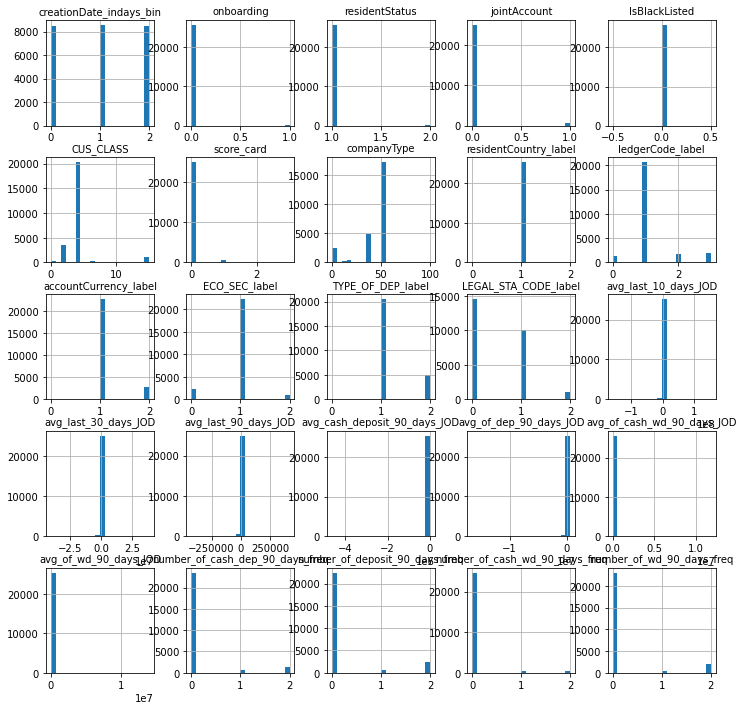

In [28]:
num_cols = ['creationDate_indays_bin','onboarding', 'residentStatus','jointAccount',
          'IsBlackListed', 'CUS_CLASS','score_card','companyType',
          'residentCountry_label', 'ledgerCode_label', 'accountCurrency_label',
          'ECO_SEC_label', 'TYPE_OF_DEP_label', 'LEGAL_STA_CODE_label',
          'avg_last_10_days_JOD', 'avg_last_30_days_JOD', 'avg_last_90_days_JOD',
          'avg_cash_deposit_90_days_JOD', 'avg_of_dep_90_days_JOD',
          'avg_of_cash_wd_90_days_JOD', 'avg_of_wd_90_days_JOD',
          'number_of_cash_dep_90_days_freq',
          'number_of_deposit_90_days_freq', 'number_of_cash_wd_90_days_freq',
          'number_of_wd_90_days_freq']

if True:
    fontsize = 10
    fig = df_entities[num_cols].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

In [29]:
#storing final clean & transform datasets into excel
df_individual.to_excel("RBA_KYC_Accounts_Ind_Ids_CLEANED.xlsx")
df_entities.to_excel("RBA_KYC_Accounts_Ent_Ids_CLEANED.xlsx")

## PCA

### Individuals' Dataset

In [30]:
#selecting the numerical columns
inputs = ['creationDate_indays_bin','onboarding', 'residentStatus','age_in_year_bin','jointAccount',
          'IsBlackListed', 'CUS_CLASS','score_card','profession_label',
          'residentCountry_label', 'ledgerCode_label', 'accountCurrency_label',
          'ECO_SEC_label', 'TYPE_OF_DEP_label', 'LEGAL_STA_CODE_label',
          'avg_last_10_days_JOD', 'avg_last_30_days_JOD', 'avg_last_90_days_JOD',
          'avg_cash_deposit_90_days_JOD', 'avg_of_dep_90_days_JOD',
          'avg_of_cash_wd_90_days_JOD', 'avg_of_wd_90_days_JOD',
          'number_of_cash_dep_90_days_freq',
          'number_of_deposit_90_days_freq', 'number_of_cash_wd_90_days_freq',
          'number_of_wd_90_days_freq'] 

#creating the PCA dataframe
df_PCA = df_individual[inputs]
df_PCA.head()

,creationDate_indays_bin,onboarding,residentStatus,age_in_year_bin,jointAccount,IsBlackListed,CUS_CLASS,score_card,profession_label,residentCountry_label,...,avg_last_30_days_JOD,avg_last_90_days_JOD,avg_cash_deposit_90_days_JOD,avg_of_dep_90_days_JOD,avg_of_cash_wd_90_days_JOD,avg_of_wd_90_days_JOD,number_of_cash_dep_90_days_freq,number_of_deposit_90_days_freq,number_of_cash_wd_90_days_freq,number_of_wd_90_days_freq
1,2,0,1,0,0,0,2,1,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0
2,2,0,1,0,0,0,2,1,0,1,...,-34672.52,-369.81,0.0,0.0,0.0,0.0,0,0,0,0
3,2,0,1,0,0,0,2,1,0,1,...,526.87,6.68,-550.0,-550.0,50.0,50.0,2,2,1,1
4,2,0,1,0,0,0,2,1,0,1,...,120.50,0.95,-540.0,-540.0,56.0,56.0,2,2,1,1
5,2,0,1,0,0,0,2,1,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0


In [31]:
#standardising and scaling the variables
num_cols = df_PCA.columns[df_PCA.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols
scaler = StandardScaler()
df_PCA[num_cols] = scaler.fit_transform(df_PCA[num_cols])

#principle component analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_PCA)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

<ipython-input-31-1c0fe418fbc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PCA[num_cols] = scaler.fit_transform(df_PCA[num_cols])
/Users/sauravghoshroy/opt/anaconda3/envs/ssp/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,principal component 1,principal component 2
0,0.028073,-0.907713
1,0.031968,-0.907582
2,-0.128535,3.737596
3,-0.128487,3.737700
4,0.028073,-0.907713


In [32]:
finalDf = pd.concat([principalDf, df_individual[['rbaGradeAbrv']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,rbaGradeAbrv
0,0.028073,-0.907713,NaN
1,0.031968,-0.907582,L
2,-0.128535,3.737596,L
3,-0.128487,3.737700,L
4,0.028073,-0.907713,L


[0.11995278 0.11612105]


<b>Only 12% of the variance can be explained with PCA.</b>

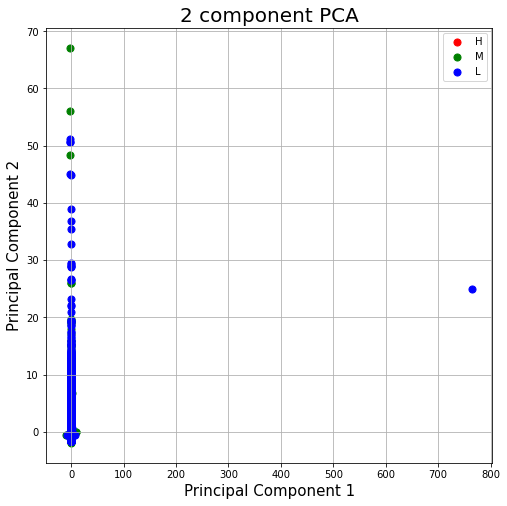

In [33]:
df_individual[['org_code','rbaGradeAbrv']].groupby('rbaGradeAbrv').count()
print(pca.explained_variance_ratio_)

display(Markdown('<b>Only 12% of the variance can be explained with PCA.</b>'))

## plotting PCA results
%matplotlib inline
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['H', 'M', 'L']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['rbaGradeAbrv'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Entities Dataset

In [34]:
#selecting the numerical columns
inputs = ['creationDate_indays_bin','onboarding', 'residentStatus','jointAccount',
          'IsBlackListed', 'CUS_CLASS','score_card','companyType',
          'residentCountry_label', 'ledgerCode_label', 'accountCurrency_label',
          'ECO_SEC_label', 'TYPE_OF_DEP_label', 'LEGAL_STA_CODE_label',
          'avg_last_10_days_JOD', 'avg_last_30_days_JOD', 'avg_last_90_days_JOD',
          'avg_cash_deposit_90_days_JOD', 'avg_of_dep_90_days_JOD',
          'avg_of_cash_wd_90_days_JOD', 'avg_of_wd_90_days_JOD',
          'number_of_cash_dep_90_days_freq','number_of_deposit_90_days_freq',
          'number_of_cash_wd_90_days_freq','number_of_wd_90_days_freq'] 

#creating the PCA dataframe
df_PCA = df_entities[inputs]
df_PCA.head()

,creationDate_indays_bin,onboarding,residentStatus,jointAccount,IsBlackListed,CUS_CLASS,score_card,companyType,residentCountry_label,ledgerCode_label,...,avg_last_30_days_JOD,avg_last_90_days_JOD,avg_cash_deposit_90_days_JOD,avg_of_dep_90_days_JOD,avg_of_cash_wd_90_days_JOD,avg_of_wd_90_days_JOD,number_of_cash_dep_90_days_freq,number_of_deposit_90_days_freq,number_of_cash_wd_90_days_freq,number_of_wd_90_days_freq
0,0,0,1,0,0,4,0,35.0,1,2,...,2170000.00,23333.33,0.0,0.0,0.0,0.0,0,0,0,0
10,1,0,1,0,0,2,0,0.0,1,3,...,647.24,7.16,0.0,0.0,0.0,0.0,0,0,0,0
11,1,0,1,0,0,2,0,0.0,1,1,...,-1060.71,-11.45,0.0,0.0,0.0,0.0,0,0,0,0
12,1,0,1,0,0,2,0,0.0,1,1,...,-2951.93,-31.89,0.0,0.0,0.0,0.0,0,0,0,0
13,1,0,1,0,0,2,0,0.0,1,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0


In [35]:
#standardising and scaling the variables
num_cols = df_PCA.columns[df_PCA.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols
scaler = StandardScaler()
df_PCA[num_cols] = scaler.fit_transform(df_PCA[num_cols])

#principle component analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_PCA)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

<ipython-input-35-1c0fe418fbc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PCA[num_cols] = scaler.fit_transform(df_PCA[num_cols])
/Users/sauravghoshroy/opt/anaconda3/envs/ssp/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,principal component 1,principal component 2
0,0.043222,-4.265021
1,-0.557375,-0.424239
2,-0.401500,-0.137000
3,-0.402003,-0.133491
4,-0.401218,-0.138967


In [36]:
finalDf = pd.concat([principalDf, df_entities[['rbaGradeAbrv']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,rbaGradeAbrv
0,0.043222,-4.265021,L
1,-0.557375,-0.424239,NaN
2,-0.401500,-0.137000,NaN
3,-0.402003,-0.133491,NaN
4,-0.401218,-0.138967,NaN


[0.13321861 0.12369823]


<b>Only 13% of the variance can be explained with PCA.</b>

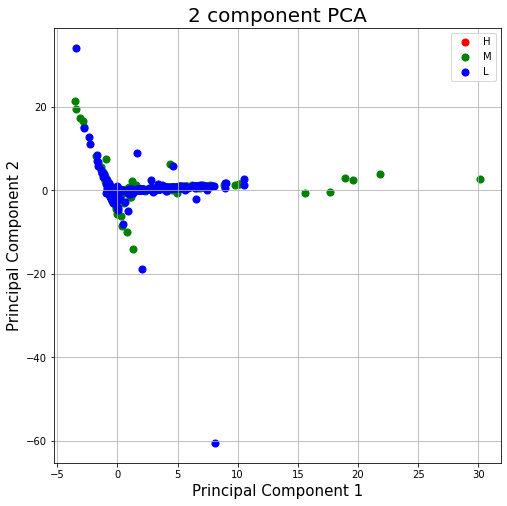

In [37]:
df_entities[['org_code','rbaGradeAbrv']].groupby('rbaGradeAbrv').count()
print(pca.explained_variance_ratio_)

display(Markdown('<b>Only 13% of the variance can be explained with PCA.</b>'))

## plotting PCA results
%matplotlib inline
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['H', 'M', 'L']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['rbaGradeAbrv'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## XGBoost Regressor - Training & Prediction

### Individual Dataset

In [38]:
#reading data
df_individual = pd.read_excel("RBA_KYC_Accounts_Ind_Ids_CLEANED.xlsx")

In [39]:
#defining input variables
inputs = ['creationDate_indays_bin', 'residentStatus','age_in_year','jointAccount',
          'IsBlackListed', 'CUS_CLASS','profession_label',
          'residentCountry_label', 'ledgerCode_label', 'accountCurrency_label',
          'ECO_SEC_label', 'TYPE_OF_DEP_label', 'LEGAL_STA_CODE_label',
          'avg_last_10_days_JOD', 'avg_last_30_days_JOD', 'avg_last_90_days_JOD',
          'avg_cash_deposit_90_days_JOD', 'avg_of_dep_90_days_JOD',
          'avg_of_cash_wd_90_days_JOD', 'avg_of_wd_90_days_JOD',
          'number_of_cash_dep_90_days_freq',
          'number_of_deposit_90_days_freq', 'number_of_cash_wd_90_days_freq',
          'number_of_wd_90_days_freq']
X_ind = df_individual[inputs]

#defining output variables
output_var = 'rbaValue'
y_ind=df_individual[output_var]

#splitting data in train and test sets
X_ind_train, X_ind_test, y_ind_train, y_ind_test = train_test_split(X_ind, y_ind, test_size=0.33, random_state=42)

# Fitting regression model
params = {'n_estimators': 150, 'learning_rate' : 0.1,'max_depth': 10, 'min_samples_split': 2,'random_state':42,
          'max_features':'auto'}
clf = GradientBoostingRegressor(**params)
clf.fit(X_ind_train, y_ind_train)

# Making predictions
y_ind_train_preds = clf.predict(X_ind_train)
y_ind_test_preds = clf.predict(X_ind_test)

### Entities Dataset

In [40]:
#reading data
df_entities = pd.read_excel("RBA_KYC_Accounts_Ent_Ids_CLEANED.xlsx")

In [41]:
#defining input variables
inputs = ['creationDate_indays', 'residentStatus','jointAccount',
          'IsBlackListed', 'CUS_CLASS','companyType',
          'residentCountry_label', 'ledgerCode_label', 'accountCurrency_label',
          'ECO_SEC_label', 'TYPE_OF_DEP_label', 'LEGAL_STA_CODE_label',
          'avg_last_10_days_JOD', 'avg_last_30_days_JOD', 'avg_last_90_days_JOD',
          'avg_cash_deposit_90_days_JOD', 'avg_of_dep_90_days_JOD',
          'avg_of_cash_wd_90_days_JOD', 'avg_of_wd_90_days_JOD',
          'number_of_cash_dep_90_days_freq',
          'number_of_deposit_90_days_freq', 'number_of_cash_wd_90_days_freq',
          'number_of_wd_90_days_freq']
X_ent = train_df[inputs]

#defining output variables
output_var = 'rbaValue'
y_ent=train_df[output_var]

#splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ent, y_ent, test_size=0.2, random_state=42)

# Fitting regression model
params = {'n_estimators': 150, 'learning_rate' : 0.1,'max_depth': 10, 'min_samples_split': 2,'random_state':42,
          'max_features':'auto'}
clf = GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

# Making predictions
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

## XGBoost Regressor - Evaluation
### Individual Dataset

In [42]:
# spearman correlation between predicted and observed values
corr, p_value = spearmanr(y_ind_train, y_ind_train_preds)
print("spearman rank correlation - train=",corr, p_value)
corr, p_value = spearmanr(y_ind_test, y_ind_test_preds)
print("spearman rank correlation - test=",corr, p_value)
# RMSE
print("RMSE - train=", mean_squared_error(y_ind_train, y_ind_train_preds, squared=False))
print("RMSE - test=", mean_squared_error(y_ind_test, y_ind_test_preds, squared=False))

spearman rank correlation - train= 0.7697894160011798 0.0
spearman rank correlation - test= 0.723368469377673 0.0
RMSE - train= 4.332018885796465
RMSE - test= 4.9274851052164985


### Entities Dataset

In [43]:
# spearman correlation between predicted and observed values
corr, p_value = spearmanr(y_ent_train, y_ent_train_preds)
print("spearman rank correlation - train=",corr, p_value)
corr, p_value = spearmanr(y_ent_test, y_ent_test_preds)
print("spearman rank correlation - test=",corr, p_value)
# RMSE
print("RMSE - train=", mean_squared_error(y_ent_train, y_ent_train_preds, squared=False))
print("RMSE - test=", mean_squared_error(y_ent_test, y_ent_test_preds, squared=False))

spearman rank correlation - train= 0.984203979256591 0.0
spearman rank correlation - test= 0.9352320360573146 0.0
RMSE - train= 1.141836716986404
RMSE - test= 2.915555401053079


### Combined Evalutation

In [44]:
y_train = pd.concat([y_ind_train,y_ent_train])
y_train_preds = np.concatenate((y_ind_train_preds,y_ent_train_preds))
y_test = pd.concat([y_ind_test,y_ent_test])
y_test_preds = np.concatenate((y_ind_test_preds,y_ent_test_preds))
# spearman correlation between predicted and observed values
corr, p_value = spearmanr(y_train, y_train_preds)
print("spearman rank correlation - train=",corr, p_value)
corr, p_value = spearmanr(y_test, y_test_preds)
print("spearman rank correlation - test=",corr, p_value)
# RMSE
print("RMSE - train=", mean_squared_error(y_train, y_train_preds, squared=False))
print("RMSE - test=", mean_squared_error(y_test, y_test_preds, squared=False))

spearman rank correlation - train= 0.8018506188637045 0.0
spearman rank correlation - test= 0.7557820595791386 0.0
RMSE - train= 4.0921089147077705
RMSE - test= 4.738523313055342


## XGBoost Classifier - Model
### Individual Dataset

In [45]:
#defining input variables
inputs = ['creationDate_indays', 'residentStatus','age_in_year','jointAccount',
          'IsBlackListed', 'CUS_CLASS','profession_label',
          'residentCountry_label', 'ledgerCode_label', 'accountCurrency_label',
          'ECO_SEC_label', 'TYPE_OF_DEP_label', 'LEGAL_STA_CODE_label',
          'avg_last_10_days_JOD', 'avg_last_30_days_JOD', 'avg_last_90_days_JOD',
          'avg_cash_deposit_90_days_JOD', 'avg_of_dep_90_days_JOD',
          'avg_of_cash_wd_90_days_JOD', 'avg_of_wd_90_days_JOD',
          'number_of_cash_dep_90_days_freq',
          'number_of_deposit_90_days_freq', 'number_of_cash_wd_90_days_freq',
          'number_of_wd_90_days_freq']
X_ind = df_individual[inputs]

#defining output variables
output_var = 'rbaGradeAbrv'
y_ind=df_individual[output_var]

In [46]:
#defining target
df_individual['TARGET']=1*df_individual[output_var].isin(['H','M'])
df_individual['TARGET'].value_counts()

0    144104
1     51229
Name: TARGET, dtype: int64

In [47]:
y_ind=df_individual['TARGET']

#splitting data in train and test sets
X_ind_train, X_ind_test, y_ind_train, y_ind_test = train_test_split(X_ind, y_ind, test_size=0.33, random_state=42)

# Fitting classification model
params = {'n_estimators': 150, 'learning_rate' : 0.1,'max_depth': 10, 'min_samples_split': 2,'random_state':42,
          'max_features':'auto'}
clf = GradientBoostingClassifier(**params)
clf.fit(X_ind_train, y_ind_train)

# Making predictions
y_ind_train_preds = clf.predict(X_ind_train)
y_ind_test_preds = clf.predict(X_ind_test)

### Entities Dataset

In [48]:
#defining input variables
inputs = ['creationDate_indays', 'residentStatus','jointAccount',
          'IsBlackListed', 'CUS_CLASS','companyType',
          'residentCountry_label', 'ledgerCode_label', 'accountCurrency_label',
          'ECO_SEC_label', 'TYPE_OF_DEP_label', 'LEGAL_STA_CODE_label',
          'avg_last_10_days_JOD', 'avg_last_30_days_JOD', 'avg_last_90_days_JOD',
          'avg_cash_deposit_90_days_JOD', 'avg_of_dep_90_days_JOD',
          'avg_of_cash_wd_90_days_JOD', 'avg_of_wd_90_days_JOD',
          'number_of_cash_dep_90_days_freq',
          'number_of_deposit_90_days_freq', 'number_of_cash_wd_90_days_freq',
          'number_of_wd_90_days_freq']
X_ent = df_entities[inputs]

#defining output variables
output_var = 'rbaGradeAbrv'
y_ent=df_entities[output_var]
df_entities[output_var].value_counts()

L    13496
M    11989
H       82
Name: rbaGradeAbrv, dtype: int64

In [49]:
#defining target
df_entities['TARGET']=1*df_entities[output_var].isin(['H','M'])
df_entities['TARGET'].value_counts()

0    13496
1    12071
Name: TARGET, dtype: int64

In [50]:
y_ent=df_entities['TARGET']

#splitting data in train and test sets
X_ent_train, X_ent_test, y_ent_train, y_ent_test = train_test_split(X_ent, y_ent, test_size=0.33, random_state=42)

# Fitting classification model
params = {'n_estimators': 150, 'learning_rate' : 0.1,'max_depth': 10, 'min_samples_split': 2,'random_state':42,
          'max_features':'auto'}
clf = GradientBoostingClassifier(**params)
clf.fit(X_ent_train, y_ent_train)

# Making predictions
y_ent_train_preds = clf.predict(X_ent_train)
y_ent_test_preds = clf.predict(X_ent_test)

## XGBoost Classifier - Evaluation
### Individual Dataset

<b>Confusion Matrix:<b>

train:
 [[95106  1473]
 [11315 22979]] 

test:
 [[45760  1765]
 [ 6955  9980]]


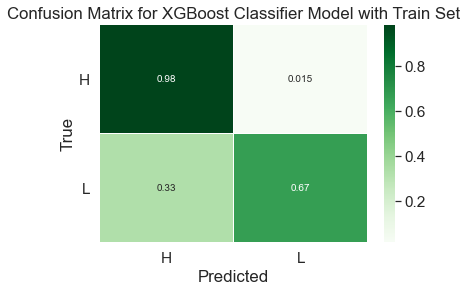

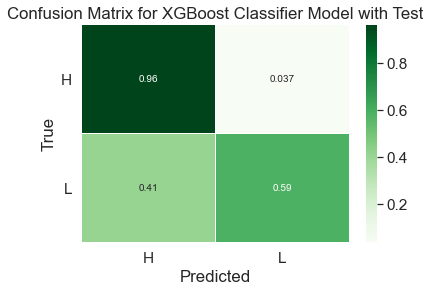

<b>Classification Report:<b>

train report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94     96579
           1       0.94      0.67      0.78     34294

    accuracy                           0.90    130873
   macro avg       0.92      0.83      0.86    130873
weighted avg       0.91      0.90      0.90    130873

test report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     47525
           1       0.85      0.59      0.70     16935

    accuracy                           0.86     64460
   macro avg       0.86      0.78      0.80     64460
weighted avg       0.86      0.86      0.86     64460



<b>Accuracy Scores:<b>

train: 0.9022869499438387
test: 0.8647223084083152


In [51]:
#confusion matrix
display(Markdown("<b>Confusion Matrix:<b>"))
print("train:\n",confusion_matrix(y_ind_train, y_ind_train_preds),'\n')
print("test:\n",confusion_matrix(y_ind_test, y_ind_test_preds))

# Get and reshape confusion matrix data
matrix_ind_train = confusion_matrix(y_ind_train, y_ind_train_preds)
matrix_ind_train = matrix_ind_train.astype('float') / matrix_ind_train.sum(axis=1)[:, np.newaxis]

matrix_ind_test = confusion_matrix(y_ind_test, y_ind_test_preds)
matrix_ind_test = matrix_ind_test.astype('float') / matrix_ind_test.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix_ind_train, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['H','L']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost Classifier Model with Train Set')
plt.show()

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix_ind_test, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['H','L']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost Classifier Model with Test')
plt.show()

#classification report
display(Markdown("<b>Classification Report:<b>"))
print("train report:\n",classification_report(y_ind_train, y_ind_train_preds))
print("test report:\n",classification_report(y_ind_test, y_ind_test_preds))

display(Markdown("<b>Accuracy Scores:<b>"))
a_score = accuracy_score(y_ind_train, y_ind_train_preds)
print("train:",a_score)
a_score = accuracy_score(y_ind_test, y_ind_test_preds)
print("test:",a_score)

### Entities Dataset

<b>Confusion Matrix:<b>

train:
 [[9066   10]
 [  29 8024]] 

test:
 [[4342   78]
 [ 162 3856]]


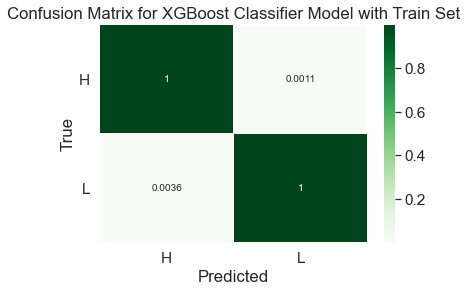

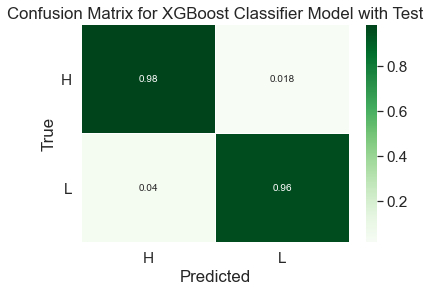

<b>Classification Report:<b>

train report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9076
           1       1.00      1.00      1.00      8053

    accuracy                           1.00     17129
   macro avg       1.00      1.00      1.00     17129
weighted avg       1.00      1.00      1.00     17129

test report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4420
           1       0.98      0.96      0.97      4018

    accuracy                           0.97      8438
   macro avg       0.97      0.97      0.97      8438
weighted avg       0.97      0.97      0.97      8438



<b>Accuracy Scores:<b>

train: 0.9977231595539728
test: 0.9715572410523821


In [52]:
#confusion matrix
display(Markdown("<b>Confusion Matrix:<b>"))
print("train:\n",confusion_matrix(y_ent_train, y_ent_train_preds),'\n')
print("test:\n",confusion_matrix(y_ent_test, y_ent_test_preds))

# Get and reshape confusion matrix data
matrix_ent_train = confusion_matrix(y_ent_train, y_ent_train_preds)
matrix_ent_train = matrix_ent_train.astype('float') / matrix_ent_train.sum(axis=1)[:, np.newaxis]

matrix_ent_test = confusion_matrix(y_ent_test, y_ent_test_preds)
matrix_ent_test = matrix_ent_test.astype('float') / matrix_ent_test.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix_ent_train, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['H','L']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost Classifier Model with Train Set')
plt.show()

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix_ent_test, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['H','L']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost Classifier Model with Test')
plt.show()

#classification report
display(Markdown("<b>Classification Report:<b>"))
print("train report:\n",classification_report(y_ent_train, y_ent_train_preds))
print("test report:\n",classification_report(y_ent_test, y_ent_test_preds))

display(Markdown("<b>Accuracy Scores:<b>"))
a_score = accuracy_score(y_ent_train, y_ent_train_preds)
print("train:",a_score)
a_score = accuracy_score(y_ent_test, y_ent_test_preds)
print("test:",a_score)

### Combined Evalutation

<b>Confusion Matrix:<b>

train:
 [[104172   1483]
 [ 11344  31003]] 

test:
 [[50102  1843]
 [ 7117 13836]] 



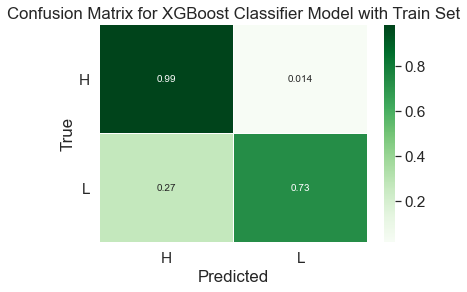

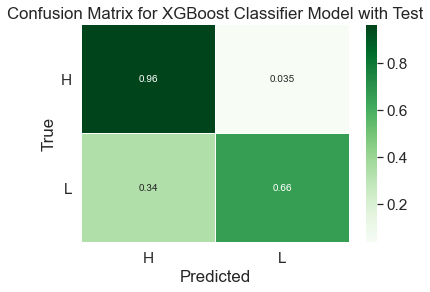

<b>Classification Report:<b>

train report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94    105655
           1       0.95      0.73      0.83     42347

    accuracy                           0.91    148002
   macro avg       0.93      0.86      0.89    148002
weighted avg       0.92      0.91      0.91    148002

test report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     51945
           1       0.88      0.66      0.76     20953

    accuracy                           0.88     72898
   macro avg       0.88      0.81      0.84     72898
weighted avg       0.88      0.88      0.87     72898



<b>Accuracy Scores:<b>

train: 0.9133322522668612
test: 0.8770885346648742


In [53]:
y_train = pd.concat([y_ind_train,y_ent_train])
y_train_preds = np.concatenate((y_ind_train_preds,y_ent_train_preds))
y_test = pd.concat([y_ind_test,y_ent_test])
y_test_preds = np.concatenate((y_ind_test_preds,y_ent_test_preds))

#confusion matrix
display(Markdown("<b>Confusion Matrix:<b>"))
print("train:\n",confusion_matrix(y_train, y_train_preds),'\n')
print("test:\n",confusion_matrix(y_test, y_test_preds),'\n')

# Get and reshape confusion matrix data
matrix_train = confusion_matrix(y_train, y_train_preds)
matrix_train = matrix_train.astype('float') / matrix_train.sum(axis=1)[:, np.newaxis]

matrix_test = confusion_matrix(y_test, y_test_preds)
matrix_test = matrix_test.astype('float') / matrix_test.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix_train, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['H','L']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost Classifier Model with Train Set')
plt.show()

plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix_test, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['H','L']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost Classifier Model with Test')
plt.show()

#classification report
display(Markdown("<b>Classification Report:<b>"))
print("train report:\n",classification_report(y_train, y_train_preds))
print("test report:\n",classification_report(y_test, y_test_preds))

display(Markdown("<b>Accuracy Scores:<b>"))
a_score = accuracy_score(y_train, y_train_preds)
print("train:",a_score)
a_score = accuracy_score(y_test, y_test_preds)
print("test:",a_score)